In [1]:
!pip install simpy

Fila unica

In [ ]:
import random
import simpy

NUM_CAJEROS = 6
CLIENTES_INTERARRIVAL_TIME = 3  #Poisson con lambda = 180 clientes por hora, como la simulacion se realiza en minutos, 180/60 = 3.
SIM_TIME = 480

def getserv_time(): #Genera el tiempo en minutos y tipo de servicio con esas probabilidades
    tiempos_serv = (0.75, 1.25, 2, 3)
    tipo_transaccion = random.choices([1, 2, 3, 4], [0.15, 0.29, 0.32, 0.24])
    return(tipo_transaccion, tiempos_serv[tipo_transaccion[0]-1])

clientes_servidos = 0
demora_total = 0

class Banco():
    def __init__(self,env, num_empleados):
        self.env = env
        self.cajeros = simpy.Resource(env, num_empleados)

    def servicio(self, cliente):
        self.tipo_serv, self.serv_time = getserv_time()
        yield self.env.timeout(random.expovariate(1/self.serv_time))

def cliente(env, nombre, banco):
    global clientes_servidos
    global demora_total
    print(f"El cliente {nombre} entra a la fila en {env.now:.2f}")
    llegada = env.now #Calcula la llegada a la final
    with banco.cajeros.request() as request:
        yield request
        espera = env.now - llegada # se calcula la espera como el tiempo entre que entro a la fila y el tiempo en el que entro a servicio
        demora_total += espera
        print (f"El cliente {nombre} entra al servicio en {env.now:.2f}")
        yield env.process(banco.servicio(nombre))
        print(f"El cliente {nombre} hace el tipo de proceso {banco.tipo_serv}")
        print (f"El cliente {nombre} termina el servicio en {env.now: 2f}")
        clientes_servidos += 1

def main(env, num_empleados ,cliente_interarrival_time):
    i = 0
    banco = Banco(env, num_empleados)

    while True:
        yield env.timeout(random.expovariate(cliente_interarrival_time)) #Tiempo entre llegada de los clientes
        i += 1
        env.process(cliente(env, i, banco))

for i in range (1):
  env = simpy.Environment()
  env.process(main(env, NUM_CAJEROS ,CLIENTES_INTERARRIVAL_TIME))
  env.run(until = SIM_TIME)

print(f"El numero de clientes atendidos es: {clientes_servidos} ")
print (f"El tiempo de espera total fue de: {demora_total/ clientes_servidos}")

Se truncaron las últimas líneas 5000 del resultado de transmisión.
El cliente 163 hace el tipo de proceso [3]
El cliente 163 termina el servicio en  61.569780
El cliente 166 entra a la fila en 61.65
El cliente 166 entra al servicio en 61.65
El cliente 165 hace el tipo de proceso [2]
El cliente 165 termina el servicio en  61.647852
El cliente 167 entra a la fila en 62.00
El cliente 167 entra al servicio en 62.00
El cliente 168 entra a la fila en 62.16
El cliente 168 entra al servicio en 62.16
El cliente 166 hace el tipo de proceso [3]
El cliente 166 termina el servicio en  62.374001
El cliente 169 entra a la fila en 62.50
El cliente 169 entra al servicio en 62.50
El cliente 164 hace el tipo de proceso [4]
El cliente 164 termina el servicio en  62.559368
El cliente 170 entra a la fila en 63.10
El cliente 170 entra al servicio en 63.10
El cliente 171 entra a la fila en 63.13
El cliente 172 entra a la fila en 63.58
El cliente 168 hace el tipo de proceso [3]
El cliente 168 termina el servic

Filas individuales


In [ ]:
import random
import simpy

NUM_CAJEROS = 6
CLIENTES_INTERARRIVAL_TIME = 3 #Poisson con lambda = 180 clientes por hora, como la simulacion se realiza en minutos, 180/60 = 3.
SIM_TIME = 480

def getserv_time(): #Genera el tiempo en minutos y tipo de servicio con esas probabilidades
    tiempos_serv = (0.75, 1.25, 2, 3)
    tipo_transaccion = random.choices([1, 2, 3, 4], [0.15, 0.29, 0.32, 0.24])
    return(tipo_transaccion, tiempos_serv[tipo_transaccion[0]-1])

clientes_servidos = 0
demora_total = 0

class Banco():
    def __init__(self,env, num_cajeros):
        self.env = env
        self.cajeros = [simpy.Resource(env) for _ in range(num_cajeros)] #Se crean cajeros individuales

    def servicio(self):
        self.tipo_serv, self.serv_time = getserv_time()
        yield self.env.timeout(random.expovariate(1/self.serv_time))

def cliente(env, nombre, banco):
    global clientes_servidos
    global demora_total
    #print(f"El cliente {nombre} entra a la fila en {env.now:.2f}")
    llegada = env.now #Calcula la llegada a la final
    longitud_fila = [NoInSystem(banco.cajeros[i]) for i in range(len(banco.cajeros))]
    #print(f"{env.now:.4f} El cliente {nombre}: Here I am. {longitud_fila}")
    for i in range(len(longitud_fila)):
        if longitud_fila[i] == 0 or longitud_fila[i] == min(longitud_fila):
            eleccion = i  # choose the shortest queue
            break

    with banco.cajeros[eleccion].request() as request:
        yield request
        espera = env.now - llegada # se calcula la espera como el tiempo entre que entro a la fila y el tiempo en el que entro a servicio
        demora_total += espera
        #print (f"El cliente {nombre} entra al servicio en {env.now:.2f}")
        yield env.process(banco.servicio())
        #print(f"El cliente {nombre} hace el tipo de proceso {banco.tipo_serv} en un tiempo de {random.expovariate(1/banco.serv_time)}")
        #print (f"El cliente {nombre} termina el servicio en {env.now: 2f}")
        clientes_servidos += 1

def NoInSystem(R):  #Total number of customers in the resource R
    return max([0, len(R.put_queue) + len(R.users)]) #returns the sum of the number waiting and the number being served for a particular counter, R.

def main(env, num_empleados ,cliente_interarrival_time):
    i = 0
    banco = Banco(env, num_empleados)
    while True:
        yield env.timeout(random.expovariate(cliente_interarrival_time)) #Tiempo entre llegada de los clientes
        i += 1
        env.process(cliente(env, i, banco))


for i in range (10):
  env = simpy.Environment()
  env.process(main(env, NUM_CAJEROS ,CLIENTES_INTERARRIVAL_TIME))
  env.run(until = SIM_TIME)

print(f"El numero de clientes atendidos es: {clientes_servidos/10} ")
print (f"El tiempo de espera total fue de: {demora_total/ clientes_servidos}")


El numero de clientes atendidos es: 1410.0 
El tiempo de espera total fue de: 3.5429633583177873


Ejercicio 1C

Valor promedio: 8.99658584807205


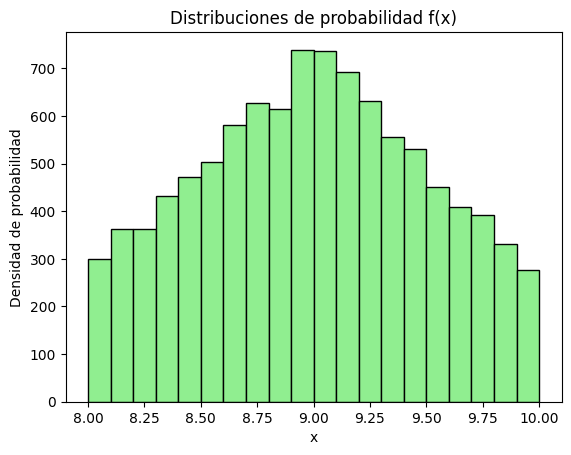

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

def F1(a,b,x):
  return (b-a)*x + a

def F2(a,b,c,x):
  if x <= (b-a)/(c-a):
    return a + math.sqrt((c-a)*(b-a)*x)
  else:
    return c - math.sqrt((c-a)*(c-b)*(1-x))

def newNumber():
  x = random.random()
  y = random.random()
  if x <= 1/2:
    return F1(8,10,y)
  else:
    return F2(8,9,10,y)


random.seed(1)
numbers = list()
suma = 0
File = open('Ejercicio1_c.txt','w')
for i in range(10000):
  num = newNumber()
  numbers.append(num)
  print(str(num),end=';  ',file=File)
  suma += num
print('Valor promedio:',suma/10000)

plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribuciones de probabilidad f(x)')
plt.hist(x = numbers, bins = 20, edgecolor = 'black', color = 'lightgreen')
plt.show()


Ejercicio 1D

Valor promedio: 7.705555509972294


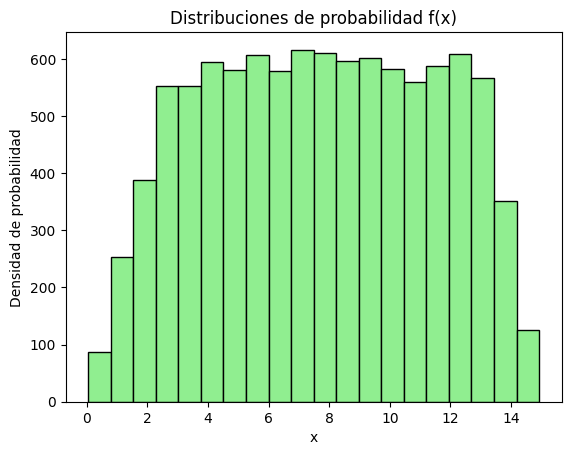

Valor promedio: 5.569533395659797


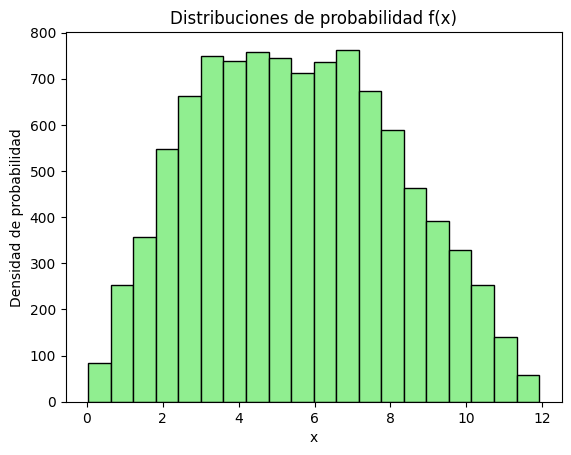

Valor promedio: 9.709737636122174


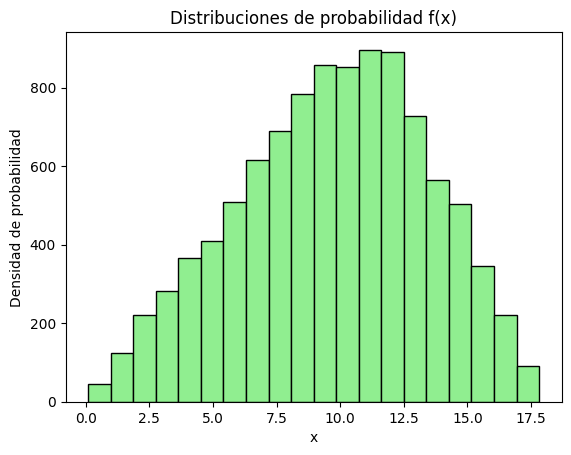

Valor promedio: 6.107318620824105


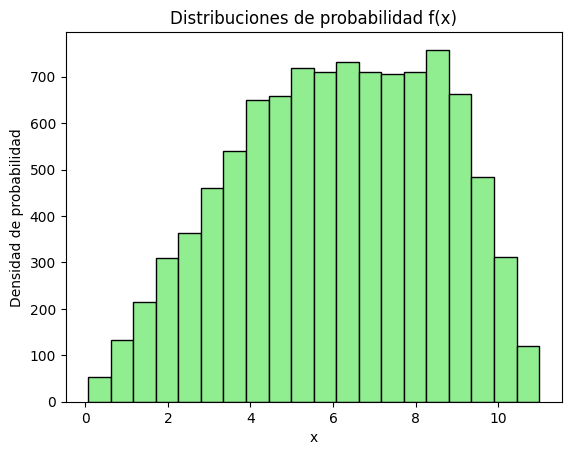

Valor promedio: 7.644379499945718


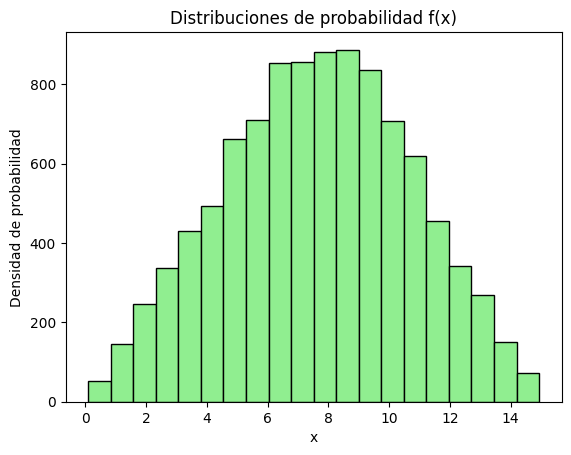

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

def F1(a,b,c,x):
  if x <= (b-a)/(c-a):
    return a + math.sqrt((c-a)*(b-a)*x)
  else:
    return c - math.sqrt((c-a)*(c-b)*(1-x))

def F2(a,b,x):
  return (b-a)*x + a

def newNumber(a,b,c):
  x = random.random()
  y = random.random()
  if x <= a/(c+b-a):
    return F1(0,a,a,y)
  x -= a/(c+b-a)

  if x <= 2*(b-a)/(c+b-a):
    return F2(a,b,y)

  return F1(b,b,c,y)

File = open('Ejercicio1_d.txt','w')
random.seed(1)
for i in range(5):
  a = random.randint(1,11)
  b = a + random.randint(1,11)
  c = b + random.randint(1,11)
  numbers = list()
  suma = 0
  for j in range(10000):
    num = newNumber(a,b,c)
    numbers.append(num)
    print(str(num),end=';  ',file=File)
    suma += num
  print('Valor promedio:',suma/10000)
  print('\n\n\n\n',file=File)

  plt.xlabel('x')
  plt.ylabel('Densidad de probabilidad')
  plt.title('Distribuciones de probabilidad f(x)')
  plt.hist(x = numbers, bins = 20, edgecolor = 'black', color = 'lightgreen')
  plt.show()

Ejercicio 3B Inversa


Valor promedio: 0.5001556977587535


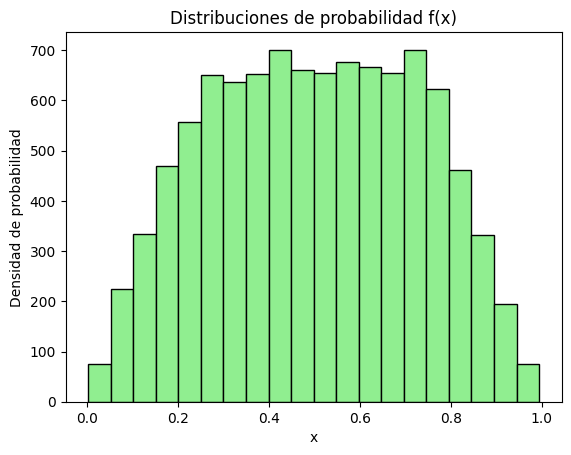

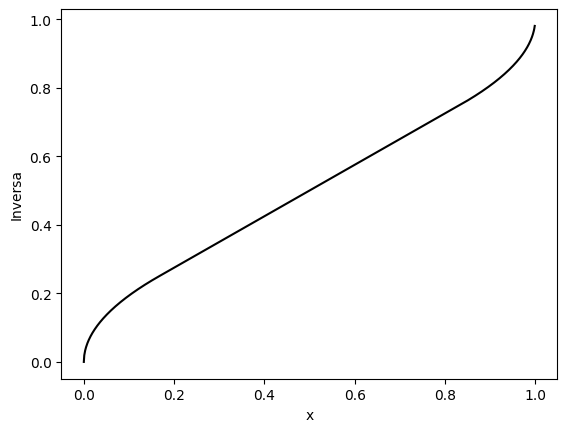

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np


def Finverse(a,x):
  if x <= a/(2*(1-a)):
    return math.sqrt(2*a*(1-a)*x)
  if x <= (2-3*a)/(2*(1-a)):
    return (2*(1-a)*x+a)/2
  return 1 - math.sqrt(2*a*(1-a)*(1-x))

def newNumber(a):
  x = random.random()
  return Finverse(a,x)


random.seed(0)
a = 1/4
numbers = list()
suma = 0
File = open('Ejercicio3_b_inversa.txt','w')
for j in range(10000):
  num = newNumber(a)
  numbers.append(num)
  print(str(num),end=';  ',file=File)
  suma += num
print('Valor promedio:',suma/10000)

plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribuciones de probabilidad f(x)')
plt.hist(x = numbers, bins = 20, edgecolor = 'black' , color = 'lightgreen')
plt.show()

X = list()
Y = list()
j = 0

while j <= 1:
  X.append(j)
  Y.append(Finverse(a,j))
  j += 0.001

plt.xlabel('x')
plt.ylabel('Inversa')
plt.plot(X, Y, color='black')
plt.show()


Ejercicio 3B Composicion

Valor promedio: 0.5004504204176022


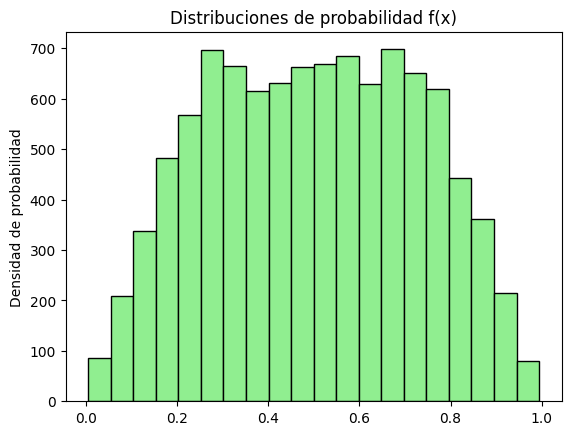

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np


def F1(a,b,c,x):
  if x <= (b-a)/(c-a):
    return a + math.sqrt((c-a)*(b-a)*x)
  else:
    return c - math.sqrt((c-a)*(c-b)*(1-x))



def F2(a,b,x):
  return (b-a)*x + a


def newNumber(a,b,c):
  x = random.random()
  y = random.random()
  if x <= a/(c+b-a):
    return F1(0,a,a,y)
  x -= a/(c+b-a)

  if x <= 2*(b-a)/(c+b-a):
    return F2(a,b,y)

  return F1(b,b,c,y)


random.seed(1)
a = 1/4
numbers = list()
suma = 0
File = open('Ejercicio3_b_composicion.txt','w')
for j in range(10000):
  num = newNumber(a,1-a,1)
  numbers.append(num)
  print(str(num),end=';  ',file=File)
  suma += num
print('Valor promedio:',suma/10000)

plt.ylabel('Densidad de probabilidad')
plt.title('Distribuciones de probabilidad f(x)')
plt.hist(x = numbers, bins = 20, edgecolor = 'black', color = 'lightgreen')

plt.show()


Ejercicio 3B Aceptacion


Valor promedio: 0.5002747464564764


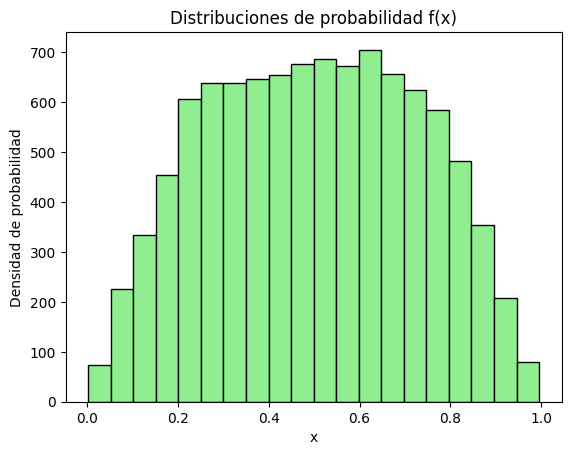

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np


def f(a,x):
  if x <= 0 or x > 1:
    return 0
  if x <= a:
    return x/(a*(1-a))
  if x <= 1 - a:
    return 1/(1-a)
  if x <= 1:
    return (1-x)/(a*(1-a))


def g(x):
  return 1


def newNumber(a):
  while True:
    u = random.random()
    y = random.random()
    if u <= f(a,y)/(2*g(y)):
      return y


random.seed(1)
numbers = list()
suma = 0
a = 1/4
File = open('Ejercicio3_b_aceptacion.txt','w')
for j in range(10000):
  num = newNumber(a)
  numbers.append(num)
  print(str(num),end=';  ',file=File)
  suma += num
print('Valor promedio:',suma/10000)


plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribuciones de probabilidad f(x)')
plt.hist(x = numbers, bins = 20, edgecolor = 'black', color = 'lightgreen')
plt.show()


Ejercicio 7

Valor promedio: 1.6000557854997608


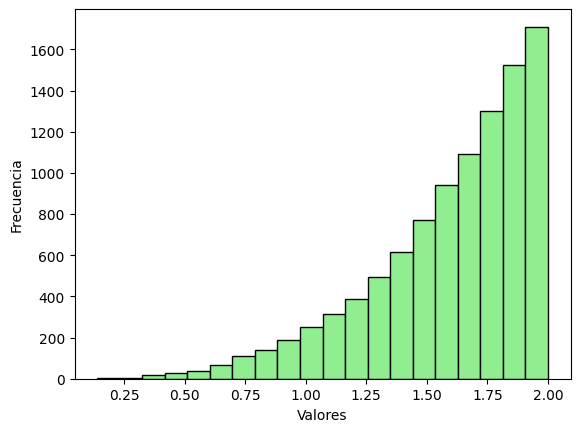

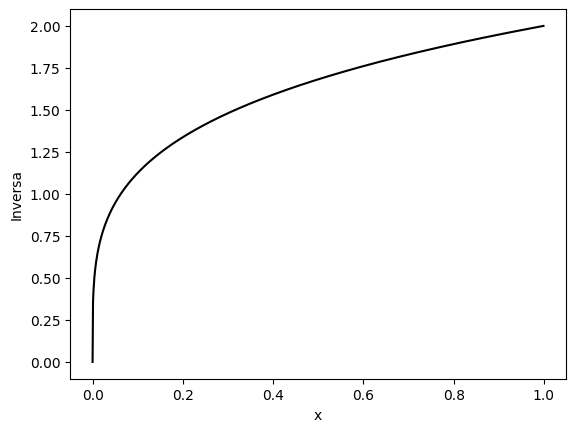

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np


def Finverse(x):
  return (16*x)**(1.0/4.0)

def newNumber():
  x = random.random()
  return Finverse(x)


random.seed(0)
numbers = list()
suma = 0
File = open('Ejercicio7_generador.txt','w')
for j in range(10000):
  num = newNumber()
  numbers.append(num)
  print(str(num),end=';  ',file=File)
  suma += num
print('Valor promedio:',suma/10000)

plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.hist(x = numbers, bins = 20, edgecolor = 'black', color = 'lightgreen')
plt.show()

X = list()
Y = list()
j = 0

while j <= 1:
  X.append(j)
  Y.append(Finverse(j))
  j += 0.001

plt.xlabel('x')
plt.ylabel('Inversa')
plt.plot(X, Y, color='black')
plt.show()